In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0


In [2]:

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()
class_names = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Shoes')

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

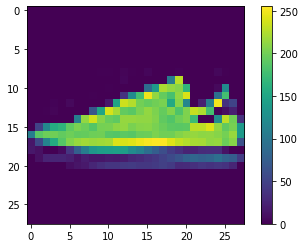

In [10]:
plt.figure()
plt.imshow(x_train[6])
plt.colorbar()
plt.grid(False)
plt.show()

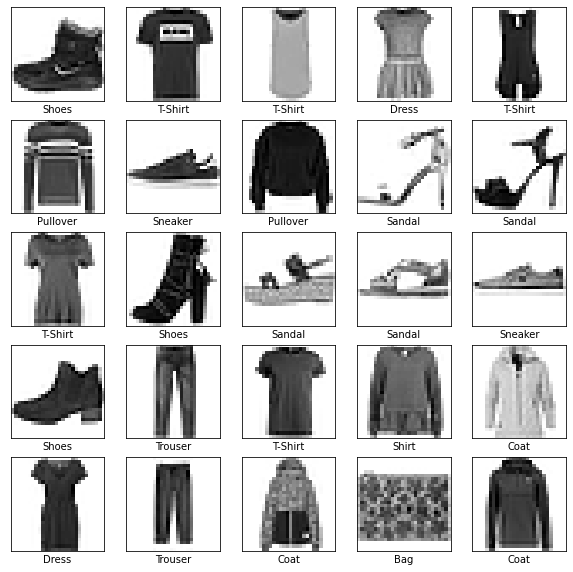

In [12]:
x_train, x_test = x_train/255, x_test/255
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:


model=tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(10, activation='softmax')
                                  ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [16]:
model.fit(x_train, y_train, epochs=30)
model.evaluate(x_test, y_test)
predictions = model(x_train[:1]).numpy()
predictions

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5165 - accuracy: 0.8160
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4986 - accuracy: 0.8231
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4827 - accuracy: 0.8288
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4719 - accuracy: 0.8331
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4601 - accuracy: 0.8373
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4507 - accuracy: 0.8401
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4436 - accuracy: 0.8437
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4350 - accuracy: 0.8465
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4263 - accuracy: 0.8491
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.421

array([[4.1485078e-09, 3.4828100e-12, 1.6668551e-09, 2.5518187e-08,
        9.5892860e-10, 9.7476423e-04, 5.2846305e-09, 6.0084877e-03,
        8.9925801e-05, 9.9292678e-01]], dtype=float32)

In [17]:
test_loss, test_accuracy=model.evaluate(x_test, y_test)
print('\nTest Accuracy', test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8667

Test Accuracy 0.8666999936103821


In [20]:
model.predict(x_test)

array([[2.0226803e-06, 4.6672199e-09, 2.2742906e-06, ..., 7.2844610e-02,
        3.8046089e-03, 8.3357716e-01],
       [5.6825800e-05, 1.5721492e-09, 9.8383778e-01, ..., 1.7574602e-19,
        1.8055835e-05, 8.1683755e-18],
       [1.7656193e-05, 9.9993587e-01, 9.1651909e-06, ..., 5.3801199e-09,
        1.2945461e-08, 6.1824715e-13],
       ...,
       [5.1392042e-03, 4.6558242e-08, 3.3599694e-04, ..., 1.0092244e-05,
        9.7464901e-01, 2.9826028e-09],
       [3.4074015e-05, 9.9793112e-01, 3.3161217e-05, ..., 5.2518025e-08,
        4.4361897e-08, 1.0516374e-08],
       [2.3948753e-05, 2.3025700e-06, 1.3868891e-04, ..., 9.0273675e-03,
        3.0407626e-03, 1.1317192e-04]], dtype=float32)

In [0]:
def plot_images(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)


  predicted_label=np.argmax(predictions_array)
  if predicted_label==true_label:
    color='blue'
  else:
   color= 'red'
  plt.xlabel("{} {:2.0f}%({})", format(class_names[predicted_label], 100*max(predictions_array), class_names[true_label]), color = color)



def plot_value_array(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10). predictions_array, color= 'a777777')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [31]:
i=0
plt.figure(figsize=(6,3)
plt.subplot(1,2,1)
plot_images(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, true_label)
plt.show()

SyntaxError: ignored